## Import Libraries

In [155]:
import pandas as pd
import numpy as np

## Load Dataset

In [156]:
data = pd.read_csv('data/revenue-data.csv')

In [157]:
data.head()

,Age,SiteSpending,SiteTime,RecommendImpression,Education,WorkType,Sex,Region,Salary
0,32,314.06,30.14,0,Degree,Private sector,Male,London,60173.49
1,20,3758.36,149.36,4,GCSE,Private sector,Female,South East,42965.45
2,36,601.72,21.87,0,Masters,Private sector,Male,East of England,54924.41
3,21,44.89,182.80,9,Masters,Private sector,Female,Northern Ireland,26734.99
4,24,614.80,194.34,0,GCSE,Private sector,Male,Scotland,15325.23


## Data Processing

In [158]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

data["Education"] = le.fit_transform(data['Education'])
data["WorkType"] = le.fit_transform(data["WorkType"])
data['Sex'] = le.fit_transform(data['Sex'])
data['Region'] =  le.fit_transform(data['Region'])
data

,Age,SiteSpending,SiteTime,RecommendImpression,Education,WorkType,Sex,Region,Salary
0,32,314.06,30.14,0,1,0,1,2,60173.49
1,20,3758.36,149.36,4,2,0,0,7,42965.45
2,36,601.72,21.87,0,3,0,1,1,54924.41
3,21,44.89,182.80,9,3,0,0,5,26734.99
4,24,614.80,194.34,0,2,0,1,6,15325.23
...,...,...,...,...,...,...,...,...,...
995,56,177.67,272.87,5,2,1,0,4,22306.84
996,54,155.42,231.17,5,5,0,1,9,27704.97
997,22,2376.10,287.15,11,5,0,1,7,62542.89
998,49,4355.04,27.78,0,1,0,1,5,96745.84


In [159]:
from sklearn import preprocessing
x = data.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
data_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(data_scaled)

In [160]:
df.head()

,0,1,2,3,4,5,6,7,8
0,0.206349,0.062878,0.084627,0.000000,0.166667,0.0,1.0,0.181818,0.359470
1,0.015873,0.854345,0.487710,0.235294,0.333333,0.0,0.0,0.636364,0.229875
2,0.269841,0.128979,0.056666,0.000000,0.500000,0.0,1.0,0.090909,0.319939
3,0.031746,0.001025,0.600771,0.529412,0.500000,0.0,0.0,0.454545,0.107643
4,0.079365,0.131985,0.639788,0.000000,0.333333,0.0,1.0,0.545455,0.021716


In [161]:
df.columns = data.columns

In [162]:
df.head()

,Age,SiteSpending,SiteTime,RecommendImpression,Education,WorkType,Sex,Region,Salary
0,0.206349,0.062878,0.084627,0.000000,0.166667,0.0,1.0,0.181818,0.359470
1,0.015873,0.854345,0.487710,0.235294,0.333333,0.0,0.0,0.636364,0.229875
2,0.269841,0.128979,0.056666,0.000000,0.500000,0.0,1.0,0.090909,0.319939
3,0.031746,0.001025,0.600771,0.529412,0.500000,0.0,0.0,0.454545,0.107643
4,0.079365,0.131985,0.639788,0.000000,0.333333,0.0,1.0,0.545455,0.021716


## Linear Regression

In [163]:
X = df['SiteSpending']
y = df['Salary']

In [164]:
from sklearn.model_selection import train_test_split

In [165]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [166]:
import pandas as np

In [167]:
X_train = np.array(X_train).reshape((len(X_train),1))
y_train = np.array(y_train).reshape((len(y_train),1))

X_test = np.array(X_test).reshape(len(X_test), 1)
y_test = np.array(y_test).reshape(len(y_test), 1)

In [168]:
from sklearn import linear_model 
import sklearn.metrics as sm
import matplotlib.pyplot as plt

In [169]:
model = linear_model.LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

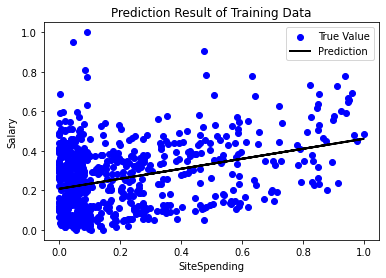

In [170]:
y_train_pred = model.predict(X_train)

plt.figure()
plt.scatter(X_train, y_train, color='blue', label="True Value")
plt.plot(X_train, y_train_pred, color='black', linewidth=2, label="Prediction")
plt.xlabel("SiteSpending")
plt.ylabel("Salary")
plt.title('Prediction Result of Training Data')
plt.legend()
plt.show()

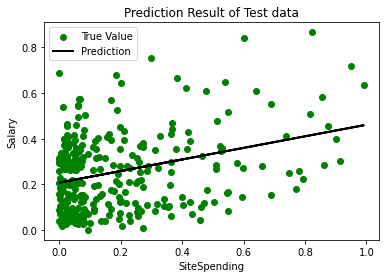

In [171]:
y_test_pred = model.predict(X_test)

plt.figure()
plt.scatter(X_test, y_test, color='green', label='True Value')
plt.plot(X_test, y_test_pred, color='black', linewidth=2, label='Prediction')
plt.xlabel("SiteSpending")
plt.ylabel("Salary")
plt.title('Prediction Result of Test data')
plt.legend()
plt.show()

In [172]:
from sklearn.metrics import accuracy_score

In [173]:
test_score = model.score(X_test, y_test)

In [174]:
test_score

0.08326185140455311

### Evaluation Metrics

In [175]:
import numpy as np

In [176]:
from sklearn import metrics
y_pred = model.predict(X_test)
print(metrics.mean_absolute_error(y_test, y_pred))
print(metrics.mean_squared_error(y_test, y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

0.13245396147972063
0.02536231064157793
0.15925548857599203


## Decision Tree Regressor

In [177]:
X = df.drop(columns= ["Salary"])
y = df['Salary']

In [178]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42)

In [179]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(700, 8)
(300, 8)
(700,)
(300,)


In [180]:
from sklearn import tree
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

reg = tree.DecisionTreeRegressor()
reg.fit(X_train, y_train)

DecisionTreeRegressor()

In [181]:
y_pred = reg.predict(X_test)

In [182]:
X_test

,Age,SiteSpending,SiteTime,RecommendImpression,Education,WorkType,Sex,Region
521,0.269841,0.415808,0.264767,0.294118,0.333333,0.333333,1.0,0.181818
737,0.428571,0.030438,0.999020,0.411765,0.500000,0.333333,0.0,0.000000
740,0.301587,0.000977,0.053792,0.000000,0.166667,1.000000,0.0,1.000000
660,0.142857,0.052872,0.240964,0.000000,1.000000,0.000000,1.0,0.727273
411,0.253968,0.020182,0.932346,0.235294,0.833333,0.000000,1.0,1.000000
...,...,...,...,...,...,...,...,...
468,0.650794,0.000563,0.023768,0.000000,0.166667,1.000000,1.0,1.000000
935,0.380952,0.024930,0.532846,0.588235,0.166667,0.333333,1.0,0.000000
428,0.285714,0.004867,0.551374,0.235294,0.333333,0.000000,0.0,0.545455
7,0.317460,0.000000,0.639281,0.235294,0.166667,0.000000,1.0,0.454545


In [183]:
y_pred_df =  pd.DataFrame(y_pred)
y_pred_df = y_pred_df.rename(columns={0: 'Predicted Salary'})
y_pred_df

,Predicted Salary
0,0.439897
1,0.226163
2,0.149833
3,0.065806
4,0.255703
...,...
295,0.077207
296,0.500822
297,0.348911
298,0.200553


In [184]:
test_score = reg.score(X_test, y_test)

In [185]:
test_score

0.6751266007988675

### Evaluation Metrics

In [186]:
print(metrics.mean_absolute_error(y_test, y_pred))
print(metrics.mean_squared_error(y_test, y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

0.06298425855231922
0.008987888288873374
0.09480447399186061


## Random Forrest Regressor

In [187]:
from sklearn.ensemble import RandomForestRegressor

rf =RandomForestRegressor(n_estimators=1000, random_state= 43)

rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=1000, random_state=43)

In [188]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(700, 8)
(300, 8)
(700,)
(300,)


In [189]:
y_pred = rf.predict(X_test)

In [190]:
X_test

,Age,SiteSpending,SiteTime,RecommendImpression,Education,WorkType,Sex,Region
521,0.269841,0.415808,0.264767,0.294118,0.333333,0.333333,1.0,0.181818
737,0.428571,0.030438,0.999020,0.411765,0.500000,0.333333,0.0,0.000000
740,0.301587,0.000977,0.053792,0.000000,0.166667,1.000000,0.0,1.000000
660,0.142857,0.052872,0.240964,0.000000,1.000000,0.000000,1.0,0.727273
411,0.253968,0.020182,0.932346,0.235294,0.833333,0.000000,1.0,1.000000
...,...,...,...,...,...,...,...,...
468,0.650794,0.000563,0.023768,0.000000,0.166667,1.000000,1.0,1.000000
935,0.380952,0.024930,0.532846,0.588235,0.166667,0.333333,1.0,0.000000
428,0.285714,0.004867,0.551374,0.235294,0.333333,0.000000,0.0,0.545455
7,0.317460,0.000000,0.639281,0.235294,0.166667,0.000000,1.0,0.454545


In [191]:
y_pred =  pd.DataFrame(y_pred)
y_pred = y_pred.rename(columns={0: 'Predicted Salary'})
y_pred

,Predicted Salary
0,0.362850
1,0.328957
2,0.265227
3,0.056778
4,0.254561
...,...
295,0.073374
296,0.508769
297,0.264112
298,0.308823


In [192]:
test_score = rf.score(X_test, y_test)
test_score

0.8984557546500777

### Evaluation metrics

In [193]:
print(metrics.mean_absolute_error(y_test, y_pred))
print(metrics.mean_squared_error(y_test, y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

0.0380572052754927
0.002809304596274469
0.05300287347186442


## K-Neighbors Regressor

In [194]:
from sklearn.neighbors import KNeighborsRegressor

# Lets define models with different neighbours

for i in range(1,11):
    neigh = KNeighborsRegressor(n_neighbors=i)
    neigh.fit(X_train, y_train)

    y_pred = neigh.predict(X_test)
    print("n_Neighbour = " + str(i) + " MSE = " + str(metrics.mean_squared_error(y_test, y_pred)))

n_Neighbour = 1 MSE = 0.026992141361485037
n_Neighbour = 2 MSE = 0.018425961887252124
n_Neighbour = 3 MSE = 0.018018715476230605
n_Neighbour = 4 MSE = 0.016716824402697096
n_Neighbour = 5 MSE = 0.017068953799817845
n_Neighbour = 6 MSE = 0.01693412207814973
n_Neighbour = 7 MSE = 0.017383478792249628
n_Neighbour = 8 MSE = 0.01778446901613431
n_Neighbour = 9 MSE = 0.01852202118496106
n_Neighbour = 10 MSE = 0.01847882925005364
